# **Диференциални уравнения и числени методи**

### **Зад 1. Явен метод на Ойлер**

- Имплементирайте явния метод на Ойлер за следното ОДУ:
  $$ \frac{dy}{dt} = -y + sin(t) \quad y(0)=y_0$$
- Изпробвайте рзлични стойности за $t_0$, $t_{end}$ и $h$.

In [16]:
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
    # write code here

def y_exact(t, y0):
    return 0.5*(np.sin(t) - np.cos(t)) + (y0 + 0.5)*np.exp(-t)

y0 = 1.0
t0 = # write code here
t_end = # write code here
h = # write code here

t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros_like(t_values)
y_values[0] = # write code here

# write code here

y_values_exact = y_exact(t_values, y0)

plt.figure(figsize=(8,5))
plt.plot(t_values, y_values, 'o-', label="Euler", markersize=4)
plt.plot(t_values, y_values_exact, '-', label="Exact", linewidth=2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.show()

IndentationError: expected an indented block after function definition on line 4 (1566849561.py, line 7)

### **Зад 2. Неявен метод на Ойлер**

- Обяснете детайлно какво прави този код за следното уравнение:
$$
\frac{dy}{dt} = -10y, \quad y(0) = 1, \quad h = 0.1
$$

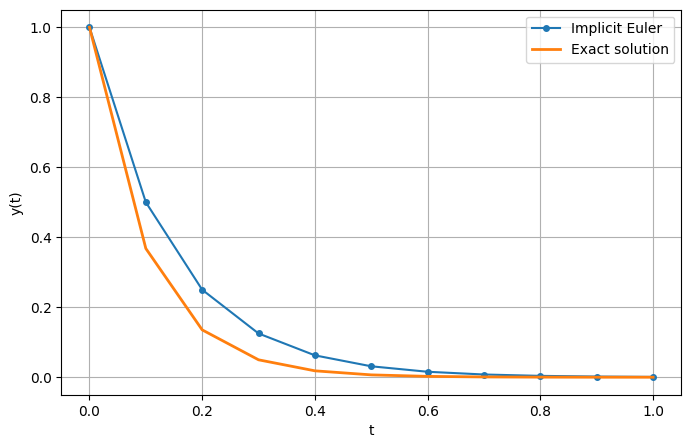

In [23]:
import numpy as np
import matplotlib.pyplot as plt

y0 = 1.0
t0 = 0.0
t_end = 1.0
h = 0.1

def f(t, y):
    return -10*y

def newton_raphson(g, y_init, tol=1e-10, max_iter=100, delta=1e-6):
    y = y_init
    for _ in range(max_iter):
        y_points = np.array([y - delta, y + delta])
        g_values = g(y_points)
        g_prime_approx = np.gradient(g_values, y_points)[1] 
        y_new = y - g(y)/g_prime_approx
        if abs(y_new - y) < tol:
            return y_new
        y = y_new
    raise RuntimeError("Newton-Raphson не е конвергирал")

t_values = np.arange(t0, t_end + h, h)
y_values = np.zeros_like(t_values)
y_values[0] = y0

for i in range(1, len(t_values)):
    t_next = t_values[i]
    y_prev = y_values[i-1]    
    g = lambda y: y - y_prev - h*f(t_next, y)
    y_values[i] = newton_raphson(g, y_prev)

y_exact = y0 * np.exp(-10*t_values)

plt.figure(figsize=(8,5))
plt.plot(t_values, y_values, 'o-', label="Implicit Euler", markersize=4)
plt.plot(t_values, y_exact, '-', label="Exact solution", linewidth=2)
plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()
plt.show()

### **Зад 3. Подобрен метод на Ойлер**

- Обяснете детайлно какво прави този код.
- Какво е $FindRoot[]$?

``` wolfram
f[t_, u_] := Sin[t]*(10-t);
t0 = 0;
T = 20;
h = 0.1;
u0 = 0;

improvedEulerMethod[f_, u0_, {t0_, T_}, h_] := 
 Module[{n, t, u, i, uPredict, uCorrect},
  n = Round[(T - t0)/h];
  t = Table[t0 + i*h, {i, 0, n}];
  u = ConstantArray[0, n + 1];
  u[[1]] = u0;
  
  For[i = 1, i <= n, i++,
   uPredict = u[[i]] + h f[t[[i]], u[[i]]];
   uCorrect = 
     uNext /. FindRoot[
       uNext == u[[i]] + (h/2) (f[t[[i]], u[[i]]] + f[t[[i+1]], uNext]),
       {uNext, uPredict}
     ];
   u[[i + 1]] = uCorrect;
  ];
  
  Transpose[{t, u}]
 ]

data = improvedEulerMethod[f, u0, {t0, T}, h];
exactSol = Quiet[DSolve[{u'[t] == f[t, u[t]], u[t0] == u0}, u, t]];
exact[t_] := u[t] /. exactSol;

Show[
 ListLinePlot[data, PlotStyle -> {Red}, PlotLegends -> {"Improved Euler"}, 
  AxesLabel -> {"t", "u(t)"}, PlotRange -> All],
 Plot[exact[t], {t, t0, T}, PlotStyle -> {Blue, Dashed}, 
  PlotLegends -> {"Exact"}]
]
```